# Load libraries

In [1]:
suppressPackageStartupMessages({
    library(cygnus)

    ## Consider adding dependencies
    library(Matrix)
    library(dplyr)
    library(data.table)
    library(purrr)

    ## Remove these dependencies 
    library(RSpectra)
    library(sf) ## my own polygons, sf only for plotting? 
    library(mclust) ## mclustBIC. Just use RcppArmadillo's version 

    ## Move to suggests 
    ## (for vignette only, not method)
    library(ggthemes)
    library(viridis)
    library(glue)
    library(patchwork)
    library(ggplot2)
    library(ComplexHeatmap)

    library(Seurat)

    library(plotly)
    library(sf)
    library(ggnewscale)
})

fig.size <- function(h, w) {
    options(repr.plot.height = h, repr.plot.width = w)
}

In [2]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/das3901/mambaforge/envs/scst3_env/lib/libopenblasp-r0.3.26.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/New_York
tzcode source: system (glibc)

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggnewscale_0.4.10     plotly_4.10.4         Seurat_5.0.1         
 [4] SeuratObject_5.0.1    sp_2.1-3              ComplexHeatmap_2.18.0
 [7] ggplot2_3.4.4         patchwork_1.2.0       glue_1.7.

# Read data

In [3]:
seurat = readRDS('../20240311LabMeeting/WB_MERFISH_animal1_coronal_C57BL6J-1_077-1_081.rds')

In [4]:
seurat

An object of class Seurat 
1122 features across 239665 samples within 1 assay 
Active assay: RNA (1122 features, 0 variable features)
 2 layers present: counts, data
 3 dimensional reductions calculated: CCF, spatial, umap

## Transcript counts for normalization

In [6]:
nCounts_RNA = colSums(seurat@assays[["RNA"]]$counts)

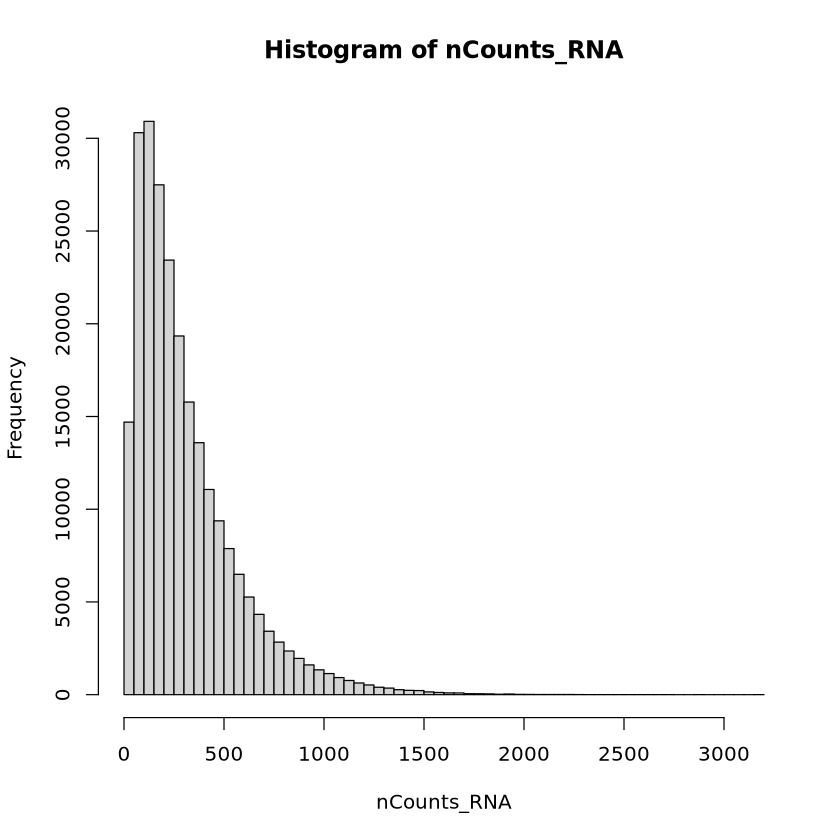

In [7]:
hist(nCounts_RNA, breaks=100)

## PCA

In [9]:
seurat <- NormalizeData(seurat, normalization.method = "LogNormalize", scale.factor = median(nCounts_RNA))
seurat <- ScaleData(seurat, features = rownames(seurat))
seurat <- RunPCA(seurat, features = rownames(seurat))

Centering and scaling data matrix

PC_ 1 
Positive:  ENSMUSG00000008734, ENSMUSG00000034903, ENSMUSG00000045092, ENSMUSG00000050953, ENSMUSG00000037625, ENSMUSG00000020932, ENSMUSG00000055322, ENSMUSG00000030605, ENSMUSG00000076439, ENSMUSG00000028927 
	   ENSMUSG00000033006, ENSMUSG00000030235, ENSMUSG00000026424, ENSMUSG00000041378, ENSMUSG00000020591, ENSMUSG00000091712, ENSMUSG00000074637, ENSMUSG00000032281, ENSMUSG00000038668, ENSMUSG00000026193 
	   ENSMUSG00000024411, ENSMUSG00000025780, ENSMUSG00000026830, ENSMUSG00000020733, ENSMUSG00000033685, ENSMUSG00000044447, ENSMUSG00000056492, ENSMUSG00000021750, ENSMUSG00000023913, ENSMUSG00000000567 
Negative:  ENSMUSG00000059456, ENSMUSG00000053025, ENSMUSG00000036760, ENSMUSG00000059146, ENSMUSG00000070570, ENSMUSG00000000861, ENSMUSG00000058624, ENSMUSG00000044216, ENSMUSG00000039809, ENSMUSG00000056427 
	   ENSMUSG00000026235, ENSMUSG00000038255, ENSMUSG00000005583, ENSMUSG00000040125, ENSMUSG00000037428, ENSMUSG00000030898, ENSM

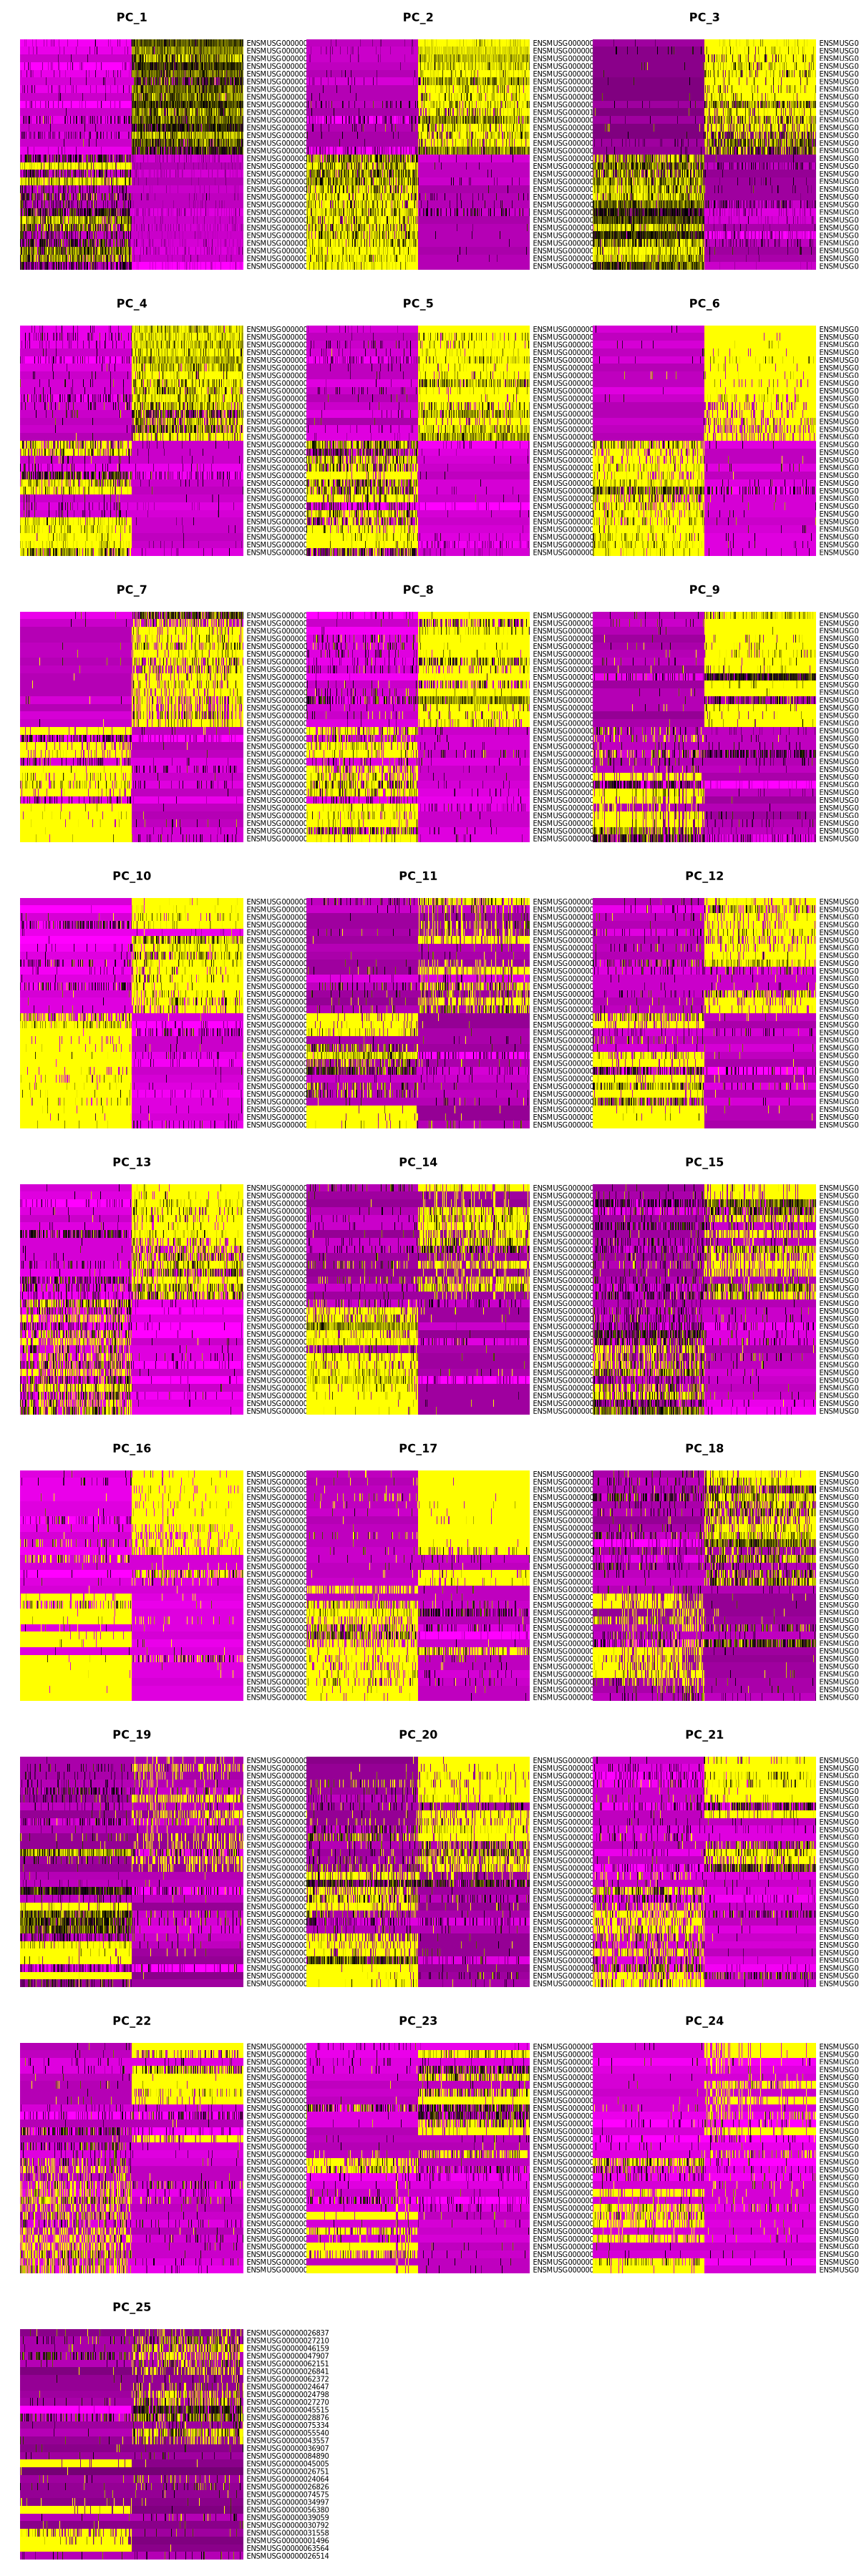

In [17]:
fig.size(30, 10)
DimHeatmap(seurat, dims = 1:25, cells = 500, balanced = TRUE)

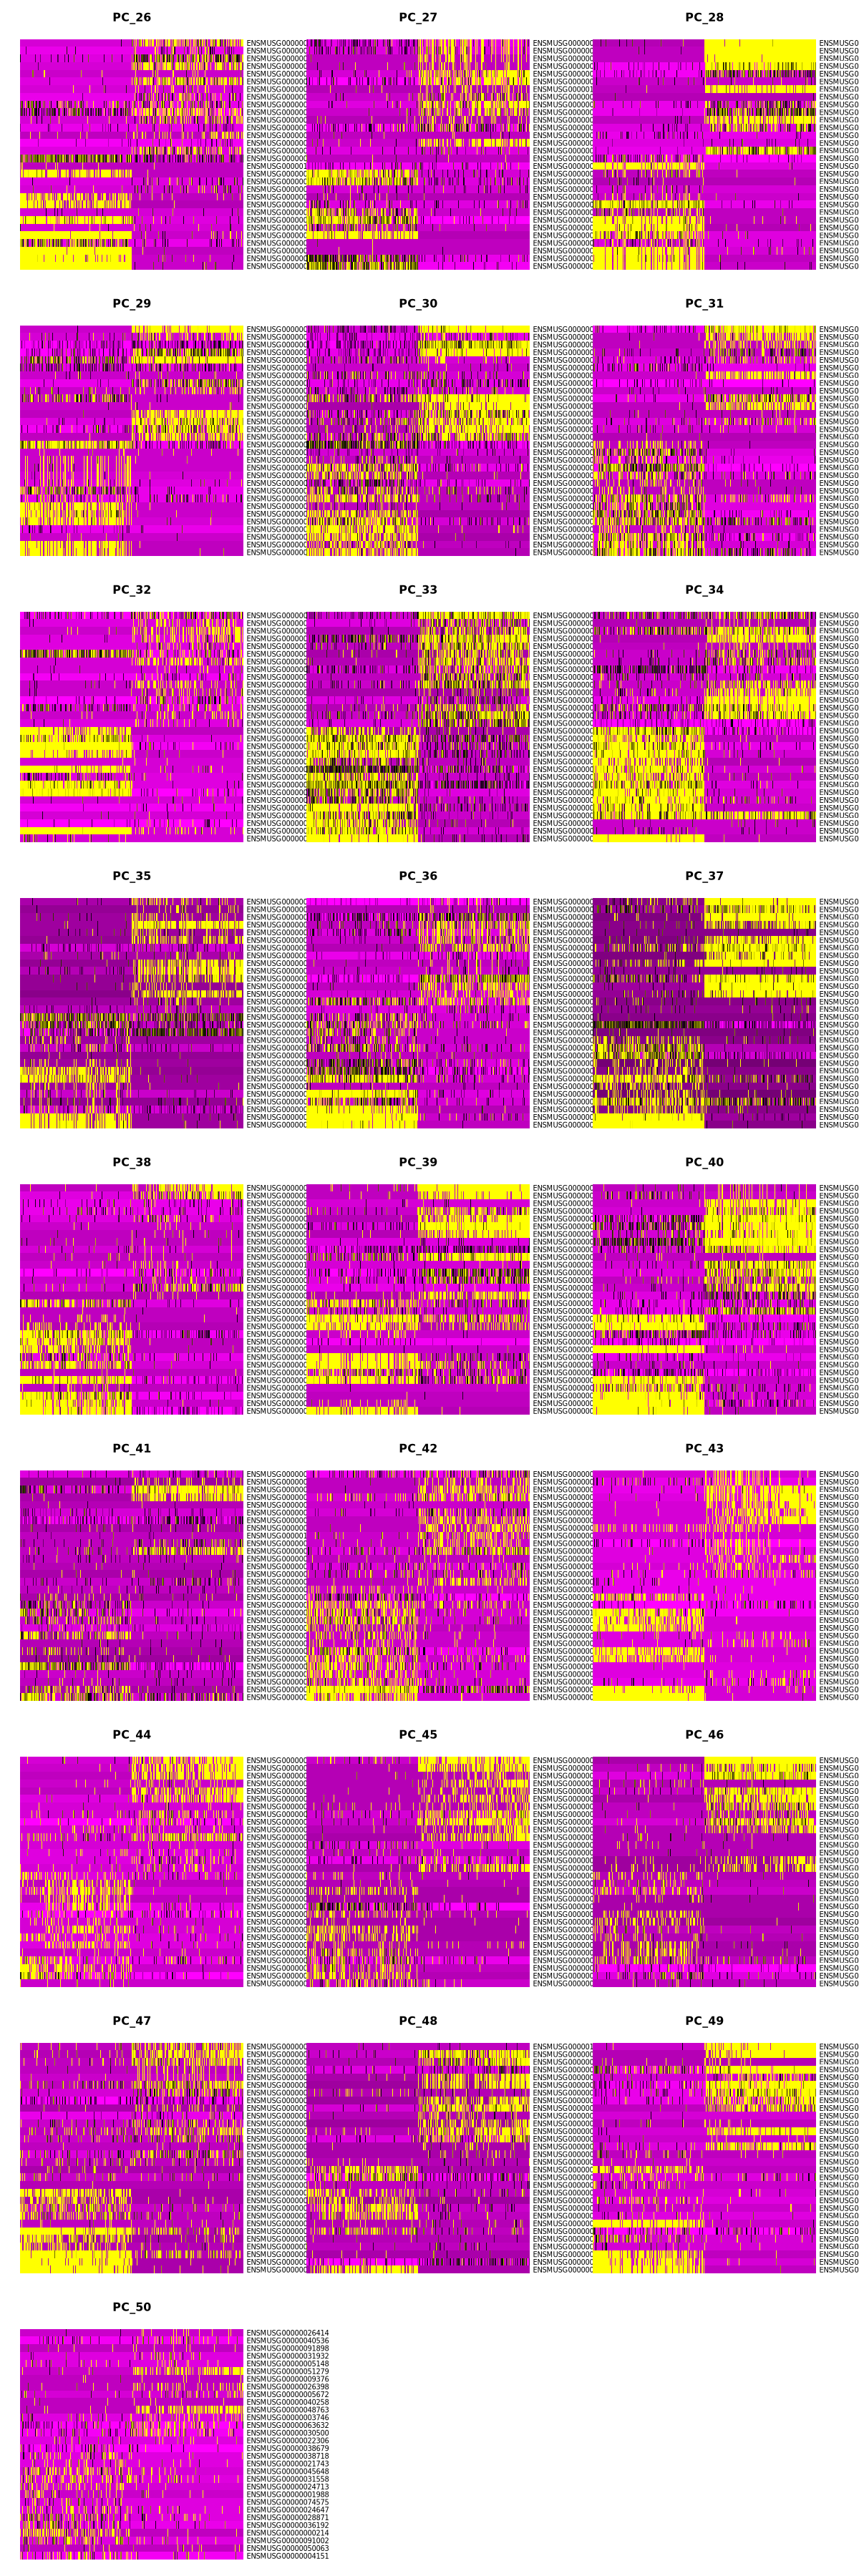

In [19]:
fig.size(30, 10)
DimHeatmap(seurat, dims = 26:50, cells = 500, balanced = TRUE)

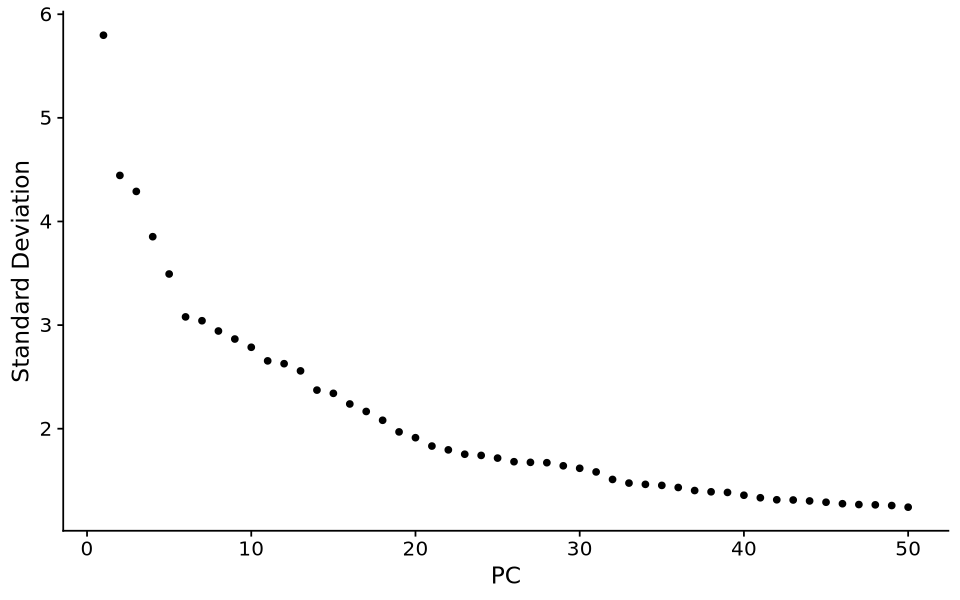

In [20]:
fig.size(5,8)
ElbowPlot(seurat, 50)

## Old UMAP

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



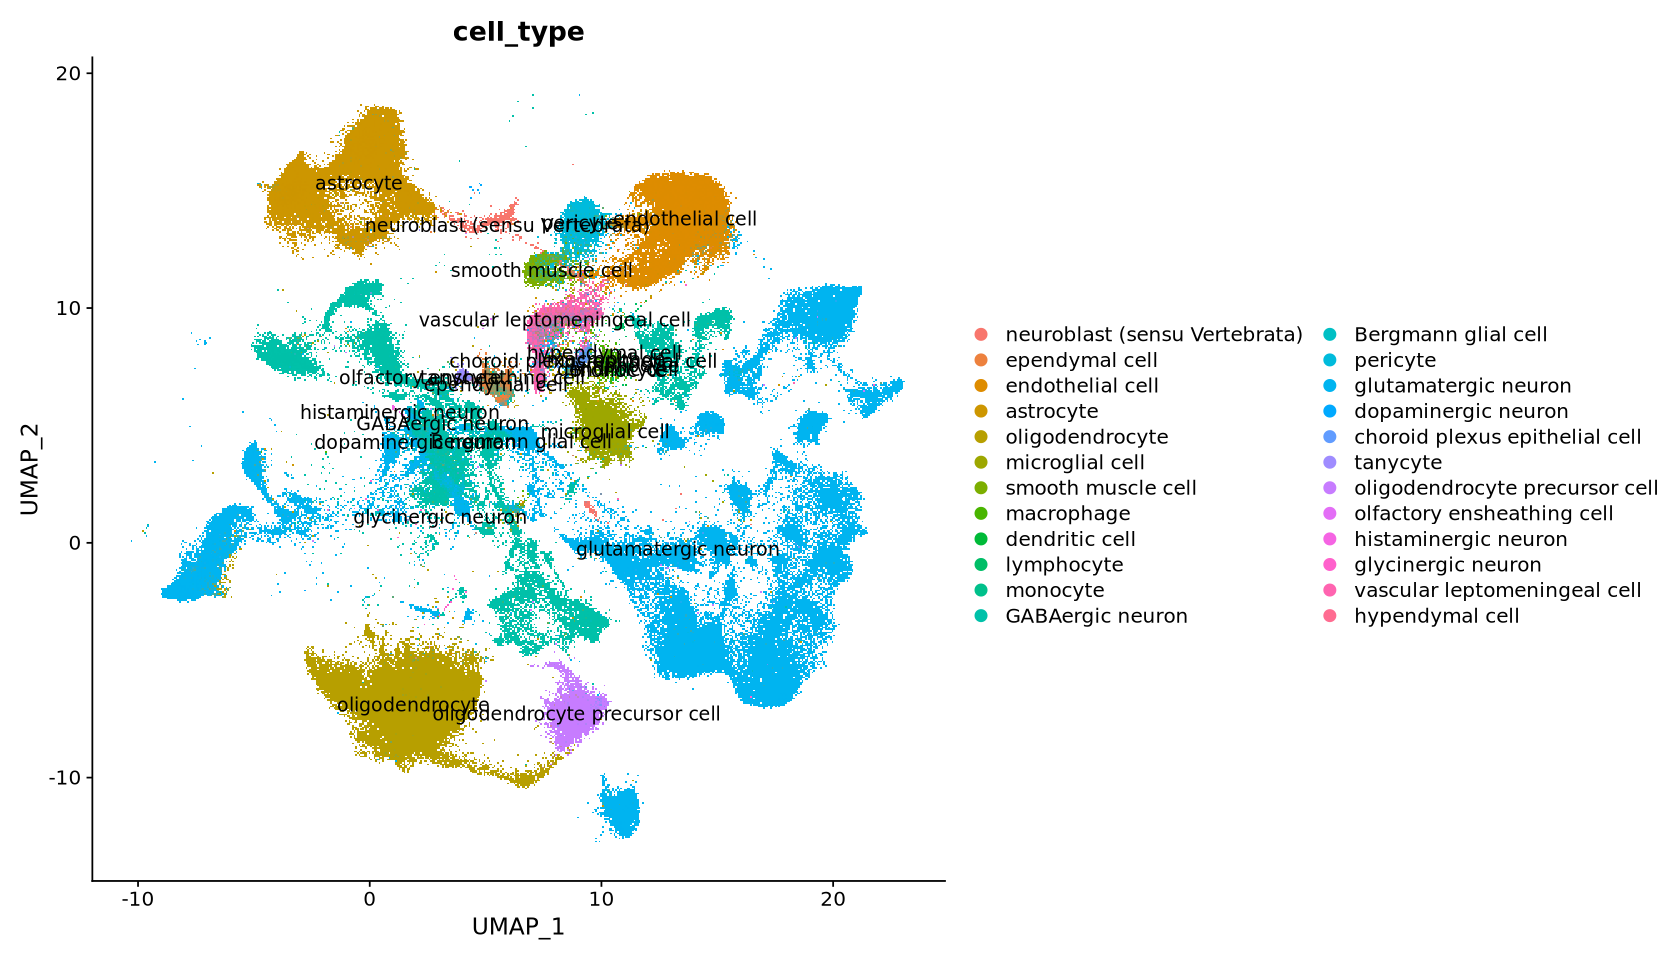

In [31]:
fig.size(8, 14)
DimPlot(seurat, reduction = "umap", group.by = "cell_type", label=TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



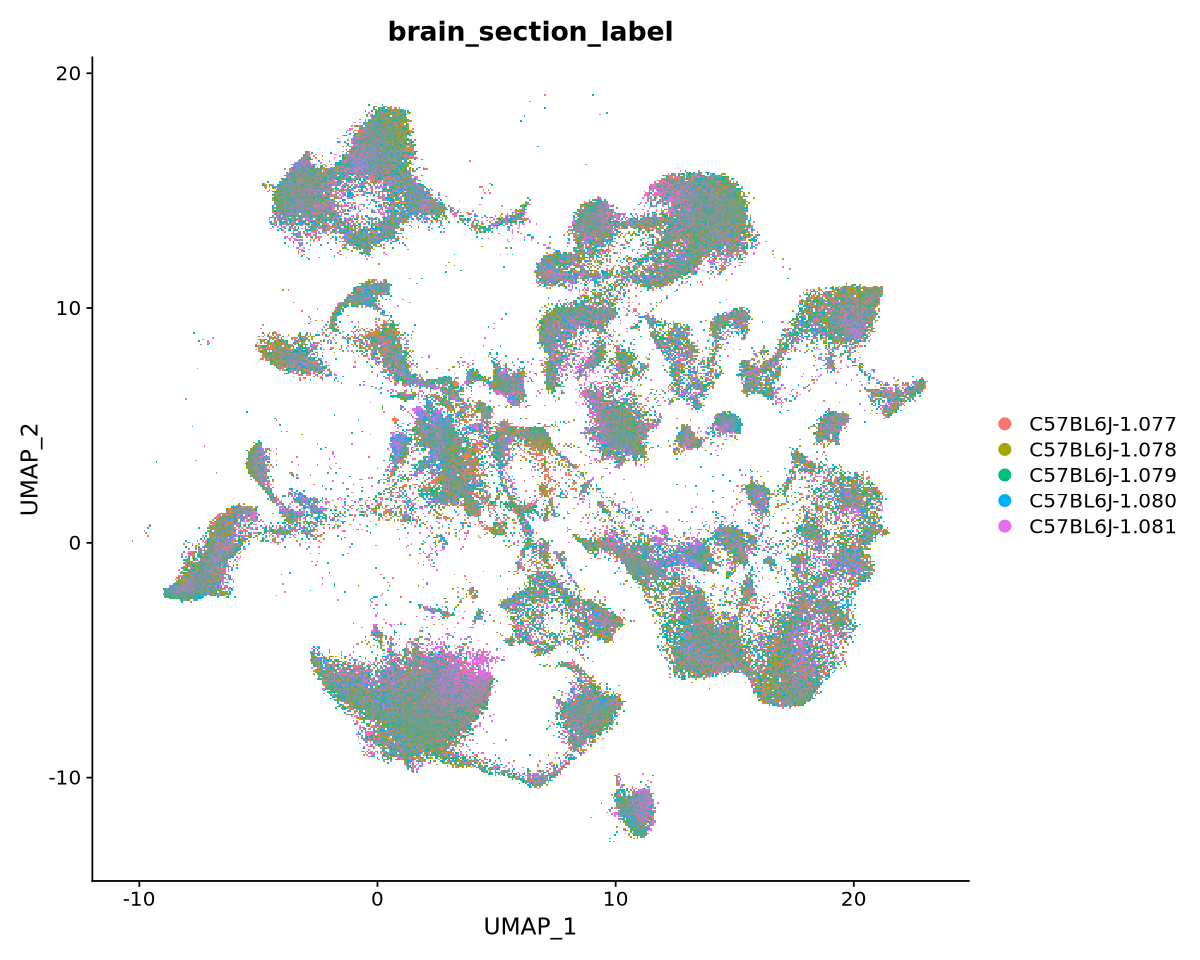

In [29]:
fig.size(8, 10)
DimPlot(seurat, reduction = "umap", group.by = "brain_section_label")

In [41]:
seurat$cortical_layers = factor(
    seurat$subclass_transfer,
    levels = as.character(unique(seurat$subclass_transfer)[grepl("L[0-9]", unique(seurat$subclass_transfer))]))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



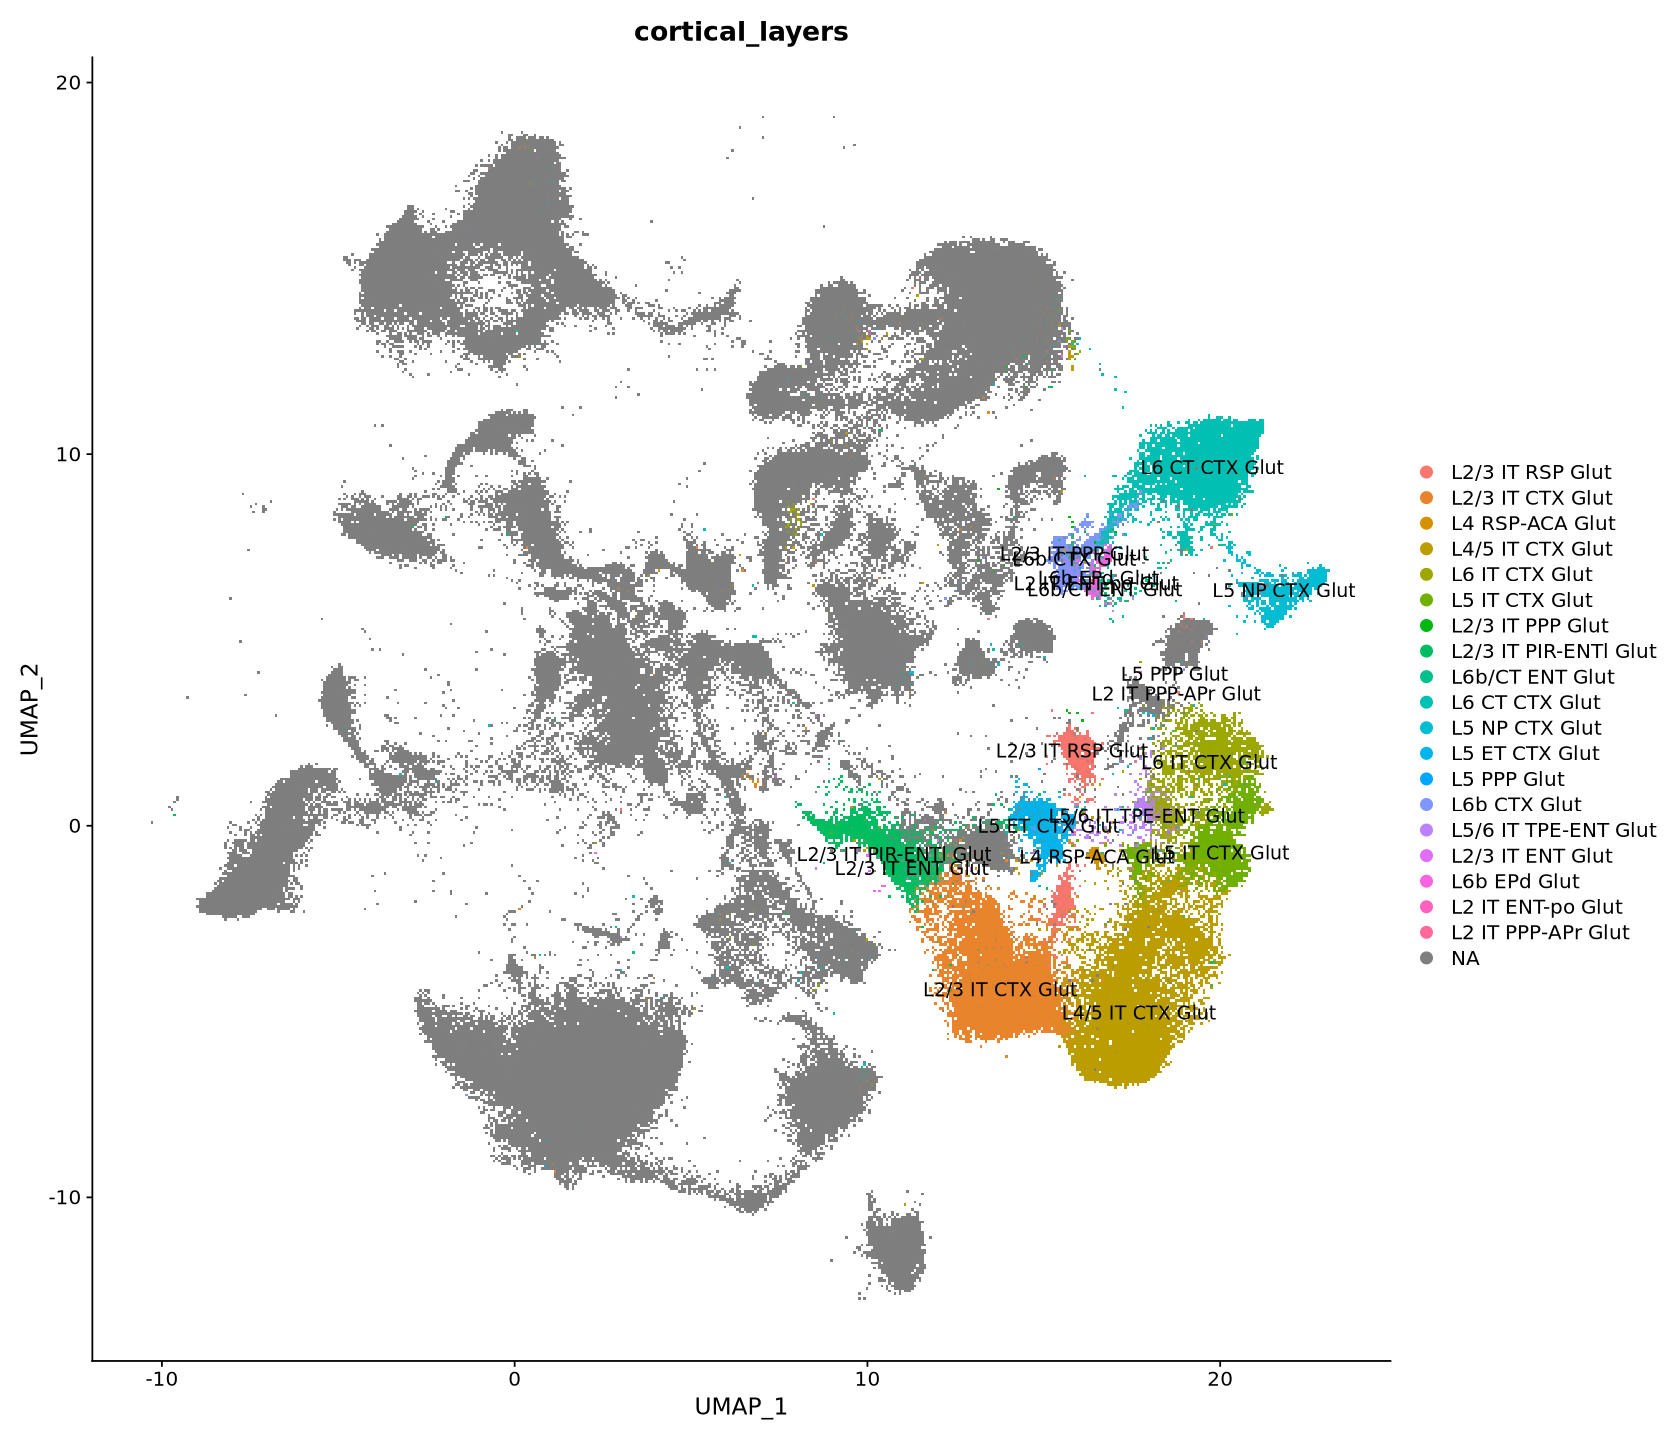

In [44]:
fig.size(12, 14)
DimPlot(seurat, reduction = "umap", group.by = "cortical_layers", label=TRUE)

## Run UMAP

In [45]:
system.time({
    seurat <- RunUMAP(seurat, dims = 1:50)
})

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
07:21:08 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

07:21:09 Read 239665 rows and found 50 numeric columns

07:21:09 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

07:21:09 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:21:54 Writing NN index file to

   user  system elapsed 
563.324   5.754 569.546 

In [46]:
saveRDS(seurat, 'WB_MERFISH_animal1_coronal_C57BL6J-1_077-1_081_umap.rds')

### Visualize

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



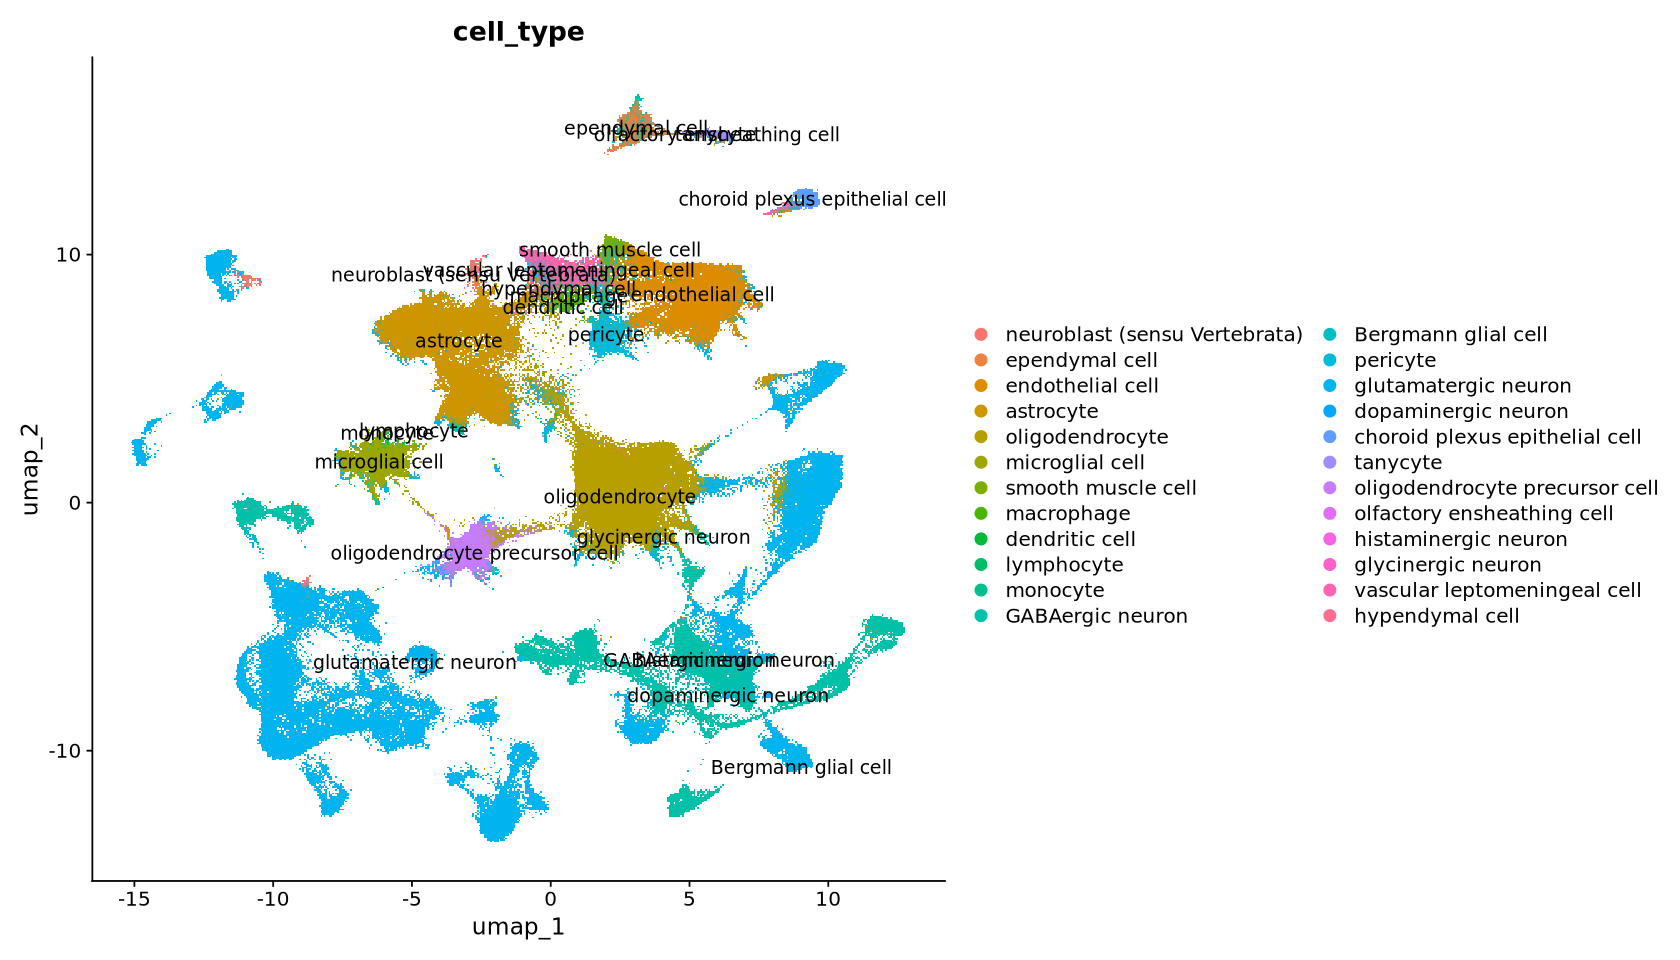

In [47]:
fig.size(8, 14)
DimPlot(seurat, reduction = "umap", group.by = "cell_type", label=TRUE)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



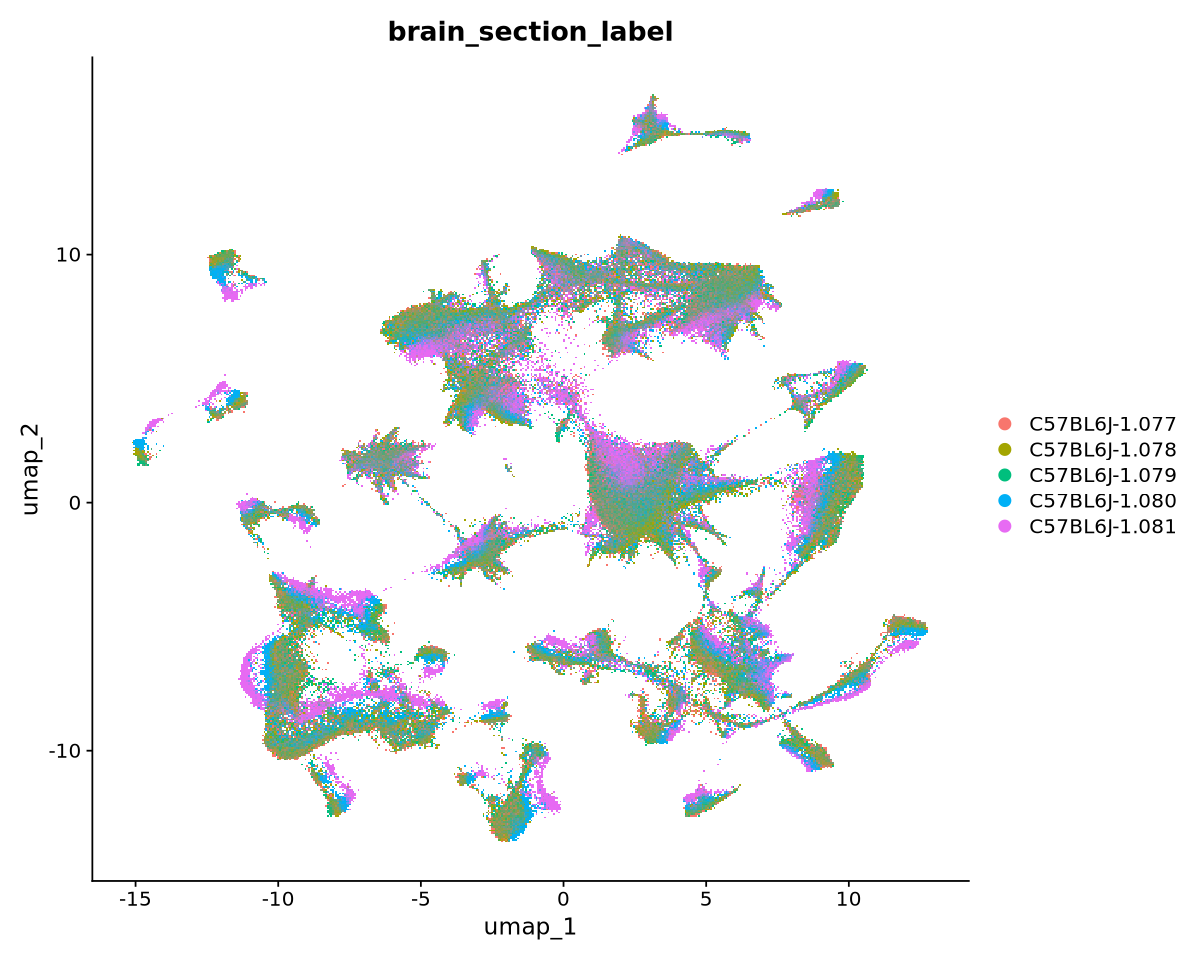

In [48]:
fig.size(8, 10)
DimPlot(seurat, reduction = "umap", group.by = "brain_section_label")

In [49]:
seurat$cortical_layers = factor(
    seurat$subclass_transfer,
    levels = as.character(unique(seurat$subclass_transfer)[grepl("L[0-9]", unique(seurat$subclass_transfer))]))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



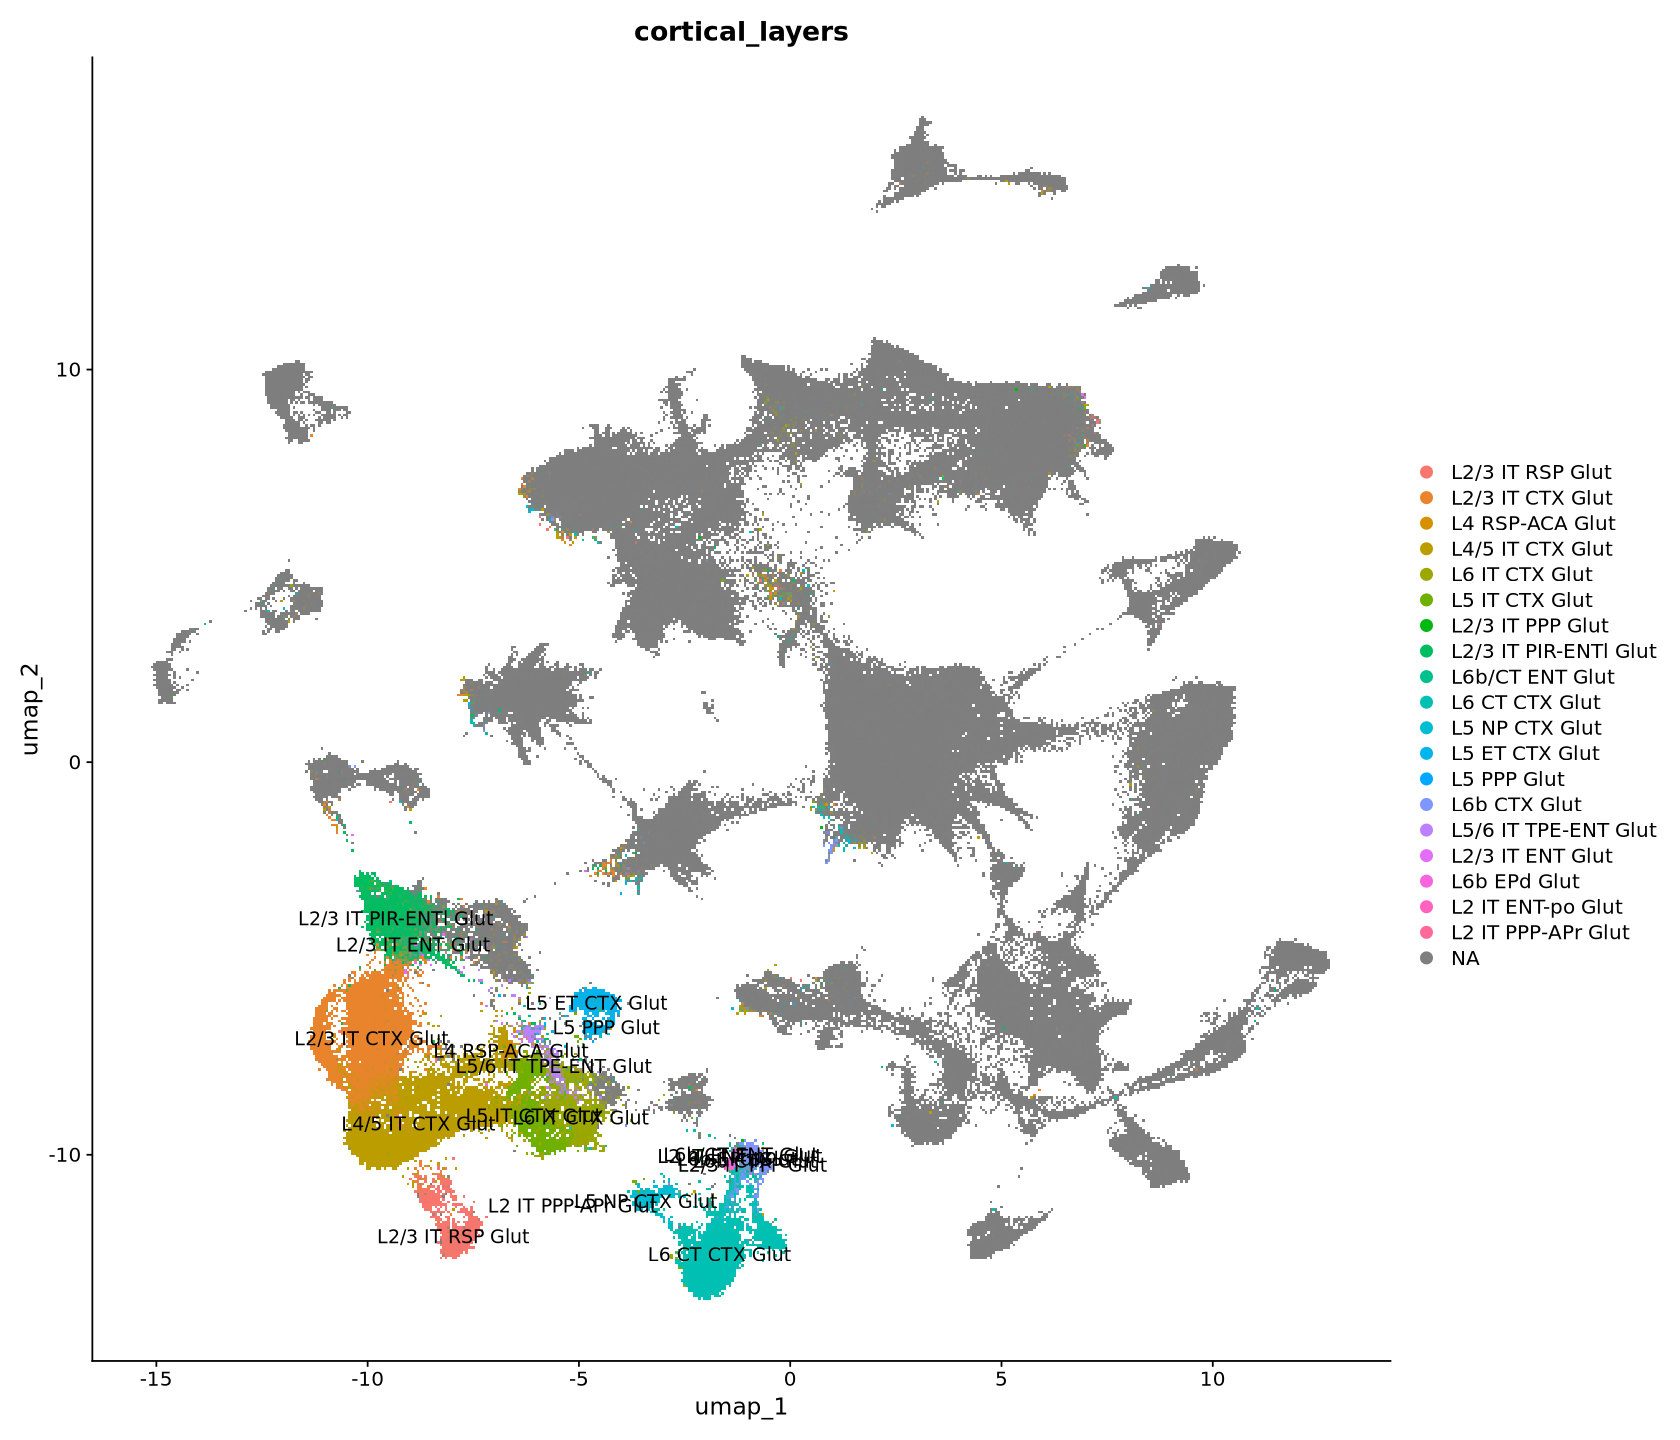

In [50]:
fig.size(12, 14)
DimPlot(seurat, reduction = "umap", group.by = "cortical_layers", label=TRUE)

## Harmonize

In [51]:
library(harmony)

In [52]:
seurat <- RunHarmony(seurat, "brain_section_label")

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony converged after 3 iterations



In [53]:
system.time({
    seurat <- RunUMAP(seurat, dims = 1:50, reduction = "harmony", reduction.name = "umap_harmony")
})

07:39:50 UMAP embedding parameters a = 0.9922 b = 1.112

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

07:39:50 Read 239665 rows and found 50 numeric columns

07:39:50 Using Annoy for neighbor search, n_neighbors = 30

Found more than one class "dist" in cache; using the first, from namespace 'BiocGenerics'

Also defined by ‘spam’

07:39:50 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:40:40 Writing NN index file to temp file /tmp/RtmpR7iP3k/file574544b61e

07:40:41 Searching Annoy index using 1 thread, search_k = 3000

07:42:21 Annoy recall = 100%

07:42:22 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

07:42:35 Initializing from normalized Laplacian + n

   user  system elapsed 
574.900   6.107 581.251 

In [54]:
saveRDS(seurat, 'WB_MERFISH_animal1_coronal_C57BL6J-1_077-1_081_harmony.rds')

### Visualize

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



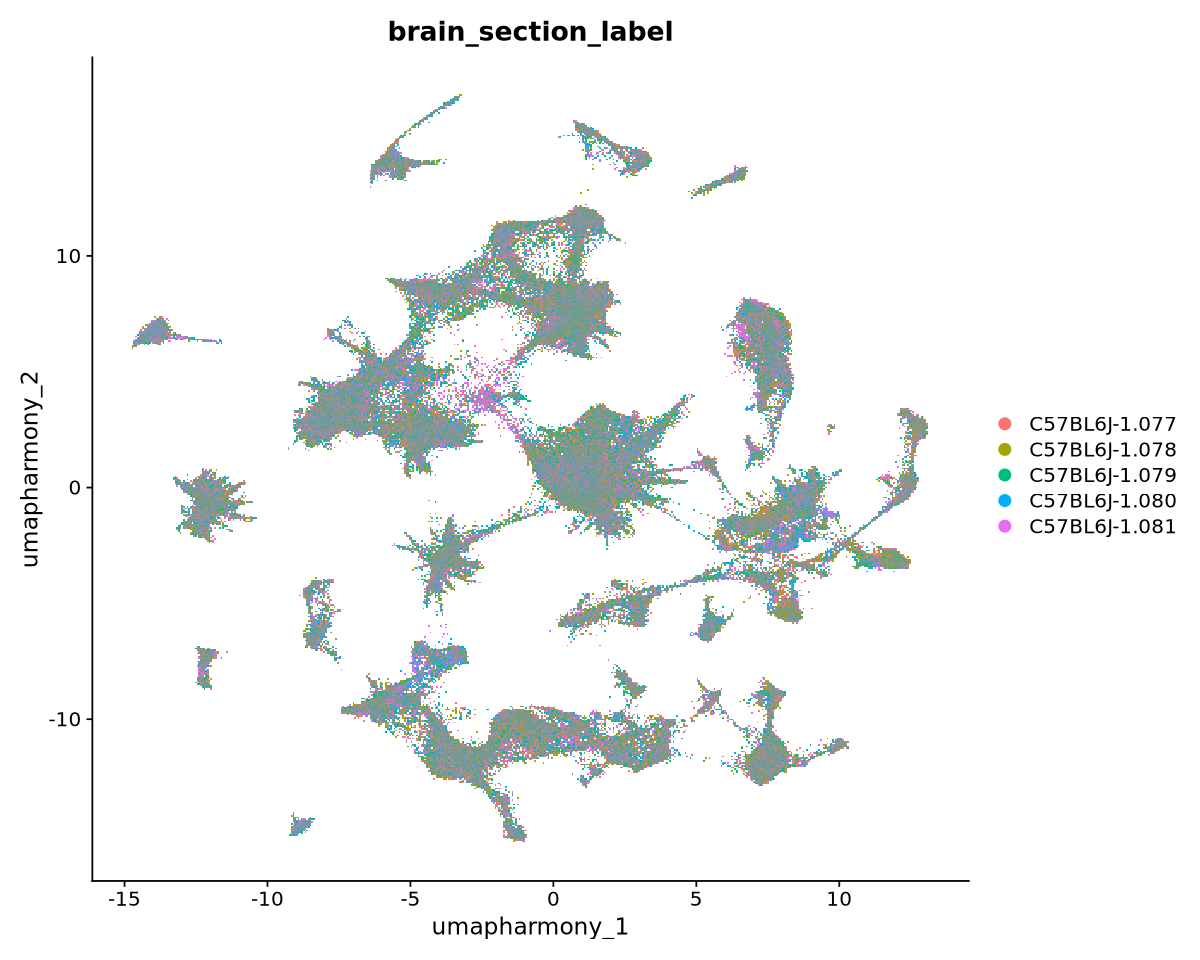

In [55]:
fig.size(8, 10)
DimPlot(seurat, reduction = "umap_harmony", group.by = "brain_section_label")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



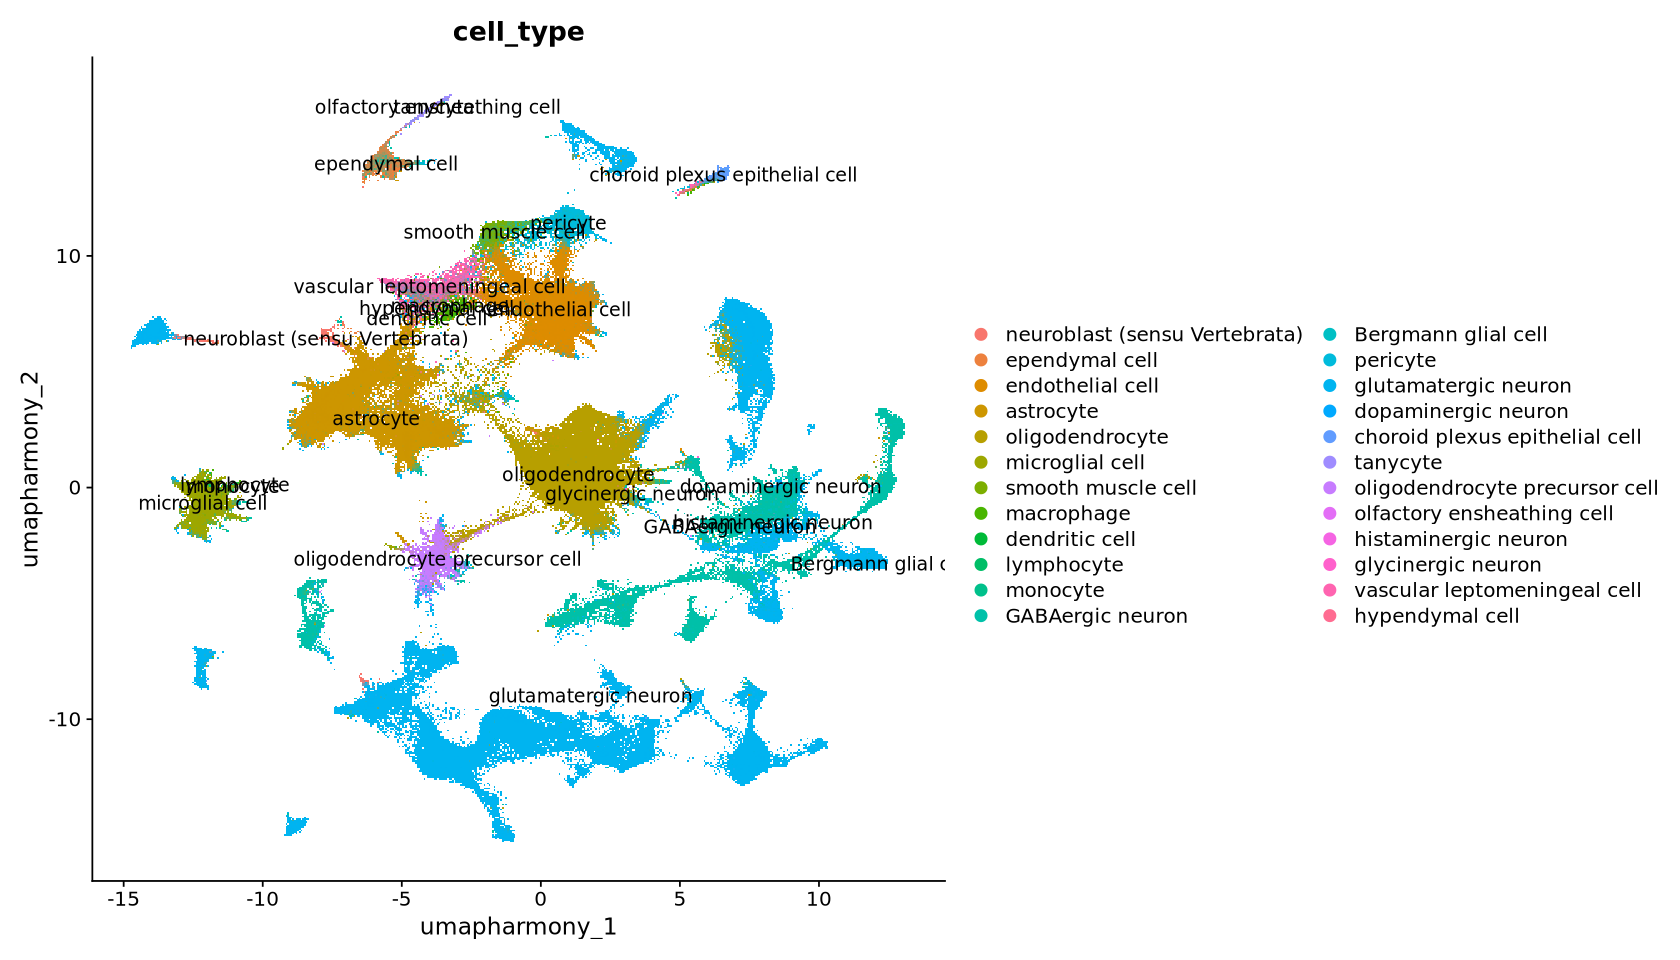

In [56]:
fig.size(8, 14)
DimPlot(seurat, reduction = "umap_harmony", group.by = "cell_type", label=TRUE)

In [57]:
seurat$cortical_layers = factor(
    seurat$subclass_transfer,
    levels = as.character(unique(seurat$subclass_transfer)[grepl("L[0-9]", unique(seurat$subclass_transfer))]))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



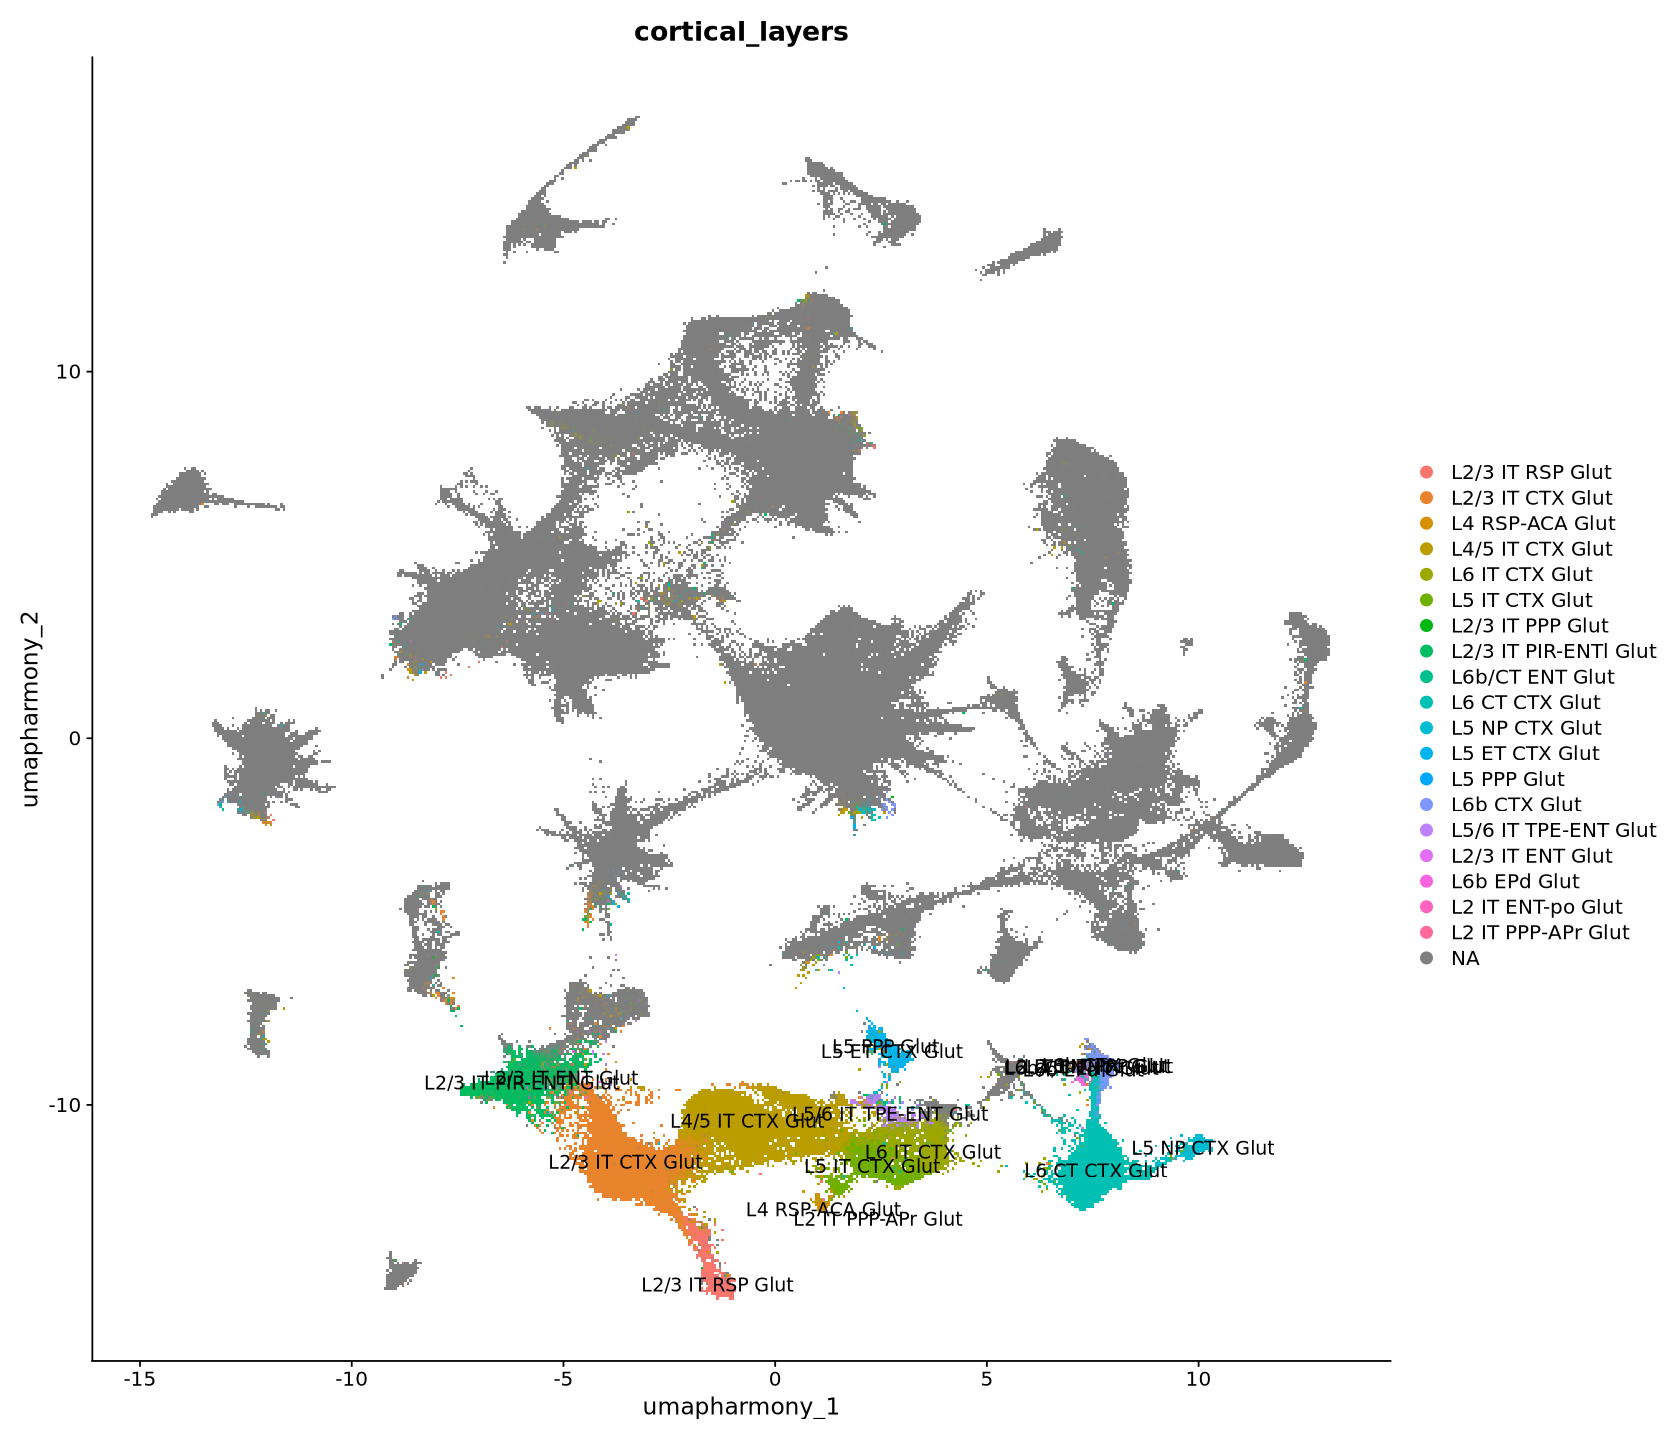

In [58]:
fig.size(12, 14)
DimPlot(seurat, reduction = "umap_harmony", group.by = "cortical_layers", label=TRUE)

# Run DMT (Harmonized)

In [74]:
res = list()
dmt = list()
aggs = list()
for (section in unique(seurat$brain_section_label)) {
    selection_brain = seurat$brain_section_label == section
    counts = seurat@assays[["RNA"]]$counts[,which(selection_brain)]

    meta_data = seurat@meta.data %>% filter(brain_section_label == section)
    meta_data$class = factor(meta_data$cell_type, levels=names(sort(table(meta_data$cell_type), decreasing=TRUE)))
    stopifnot(all(rownames(meta_data) == rownames(seurat@reductions$spatial@cell.embeddings[which(selection_brain),])))
    meta_data = cbind(meta_data, seurat@reductions$spatial@cell.embeddings[which(selection_brain),]) %>% rename(x = SPATIAL_1, y = SPATIAL_2)
    
    system.time({
        res[[section]] = GetTiles(
            meta_data$x, meta_data$y, counts, meta_data,
            c('class', 'major_brain_region', 'ccf_region_name', 'cluster_id_transfer', 'subclass_transfer'),
            npcs = 50,
            max_npts = 50, 
            min_npts = 5,
            prune_thresh_quantile = 0.997,
            prune_min_cells = 1,
            smooth_distance = 'projected', smooth_similarity = 'projected' ## Typically more discriminative 
            # smooth_distance = 'none', smooth_similarity = 'none' ## DEFAULT
        )
        dmt[[section]] = res$dmt
        aggs[[section]] = res$aggs
    })
}

STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION

STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION

STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION

STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION

STEP 0: PREPARE DATA STRUCTURES

STEP 1: GRADIENTS 

STEP 2: DMT

STEP 3: AGGREGATION

